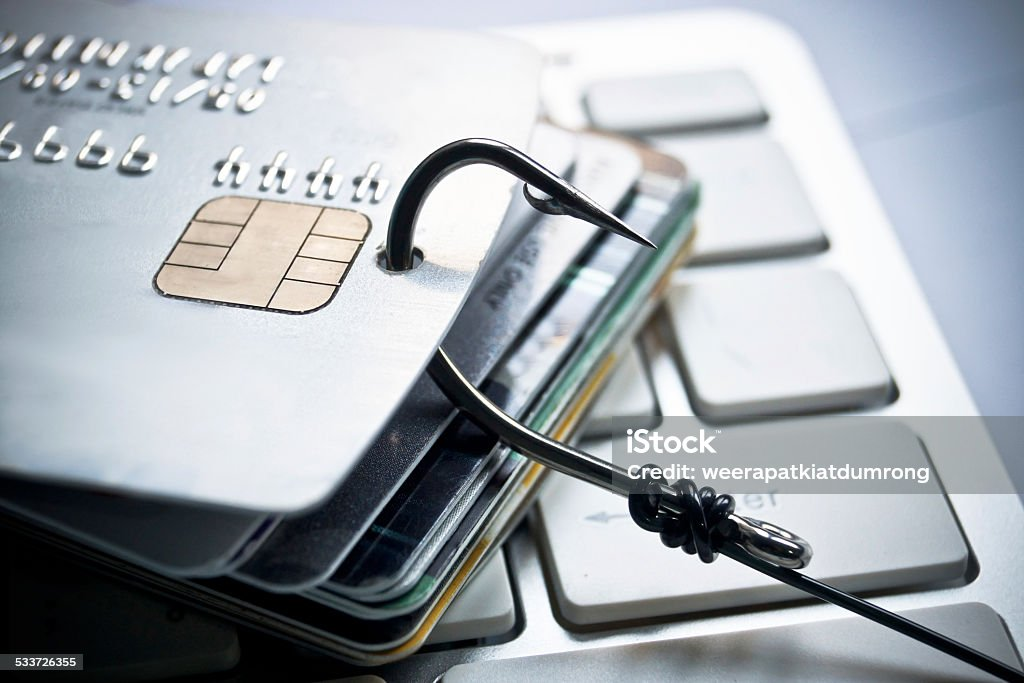

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"]= (10,5)

In [3]:
df = pd.read_csv('application_data.csv')
credit_data = df
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'application_data.csv'

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df_dict = pd.read_csv("columns_description.csv")

In [ ]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 1000

In [ ]:
df_dict.head(160)

In [ ]:
credit_data.info(8)

In [ ]:
df.describe()

In [ ]:
null_perc = df.isnull().sum()/len(df)*100

null_perc.sort_values(ascending = False)

In [ ]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values>(.45*len(df))]
null_col

In [ ]:
import missingno as msno

In [ ]:
msno.matrix(df);

In [ ]:
null_col.plot(kind = 'bar', color ='g');

In [ ]:
def remove_nulls(data):
    perc = 0.45
    null_data = data.copy() 
    shape_before = null_data.shape
    remove_cols = null_data.isnull().sum()/len(null_data)
    remove_cols = list(remove_cols[remove_cols.values > perc].index)
    null_data.drop(labels = remove_cols, axis= 1, inplace =True)
    print("No of columns dropped", len(remove_cols))
    print("R&C before", shape_before, "R&C after", null_data.shape)
    return null_data

In [ ]:
df_c = remove_nulls(df)

In [ ]:
null_col = df.isnull().sum().sort_values(ascending = False)

null_perc = df_c.isnull().sum()/len(df)*100

null_perc.sort_values(ascending = False)

In [ ]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

In [ ]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

In [ ]:
impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON',      
'AMT_REQ_CREDIT_BUREAU_WEEK',   
'AMT_REQ_CREDIT_BUREAU_DAY',     
'AMT_REQ_CREDIT_BUREAU_HOUR',]

for i in impute_list:
    df_c[i]= df_c[i].fillna(0)

In [ ]:
null_perc = df_c.isnull().sum()/len(df)*100

null_perc.sort_values(ascending = False)

In [ ]:
df_c['AMT_ANNUITY'] = df_c['AMT_ANNUITY'].fillna(df_c.AMT_ANNUITY.median())

In [ ]:
df_c['AMT_GOODS_PRICE'] = df_c['AMT_GOODS_PRICE'].fillna(df_c.AMT_GOODS_PRICE.median())

In [ ]:
null_perc = df_c.isnull().sum()/len(df)*100

null_perc.sort_values(ascending = False)

In [ ]:
df_c['DAYS_BIRTH'].unique()

In [ ]:
df_c['DAYS_EMPLOYED'].unique()

In [ ]:
df_c['DAYS_REGISTRATION'].unique()

In [ ]:
 df_c['DAYS_ID_PUBLISH'].unique()

In [ ]:
error_col =['DAYS_BIRTH',
            'DAYS_EMPLOYED',
            'DAYS_REGISTRATION',
            'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [ ]:
df_c[error_col]= abs(df_c[error_col])

In [ ]:
df_c['DAYS_BIRTH'].unique()

In [ ]:
df_c['DAYS_LAST_PHONE_CHANGE'].unique()

In [ ]:
df_c.CODE_GENDER.value_counts()

In [ ]:
df_c.loc[df_c.CODE_GENDER == 'XNA','CODE_GENDER'] ='F'

In [ ]:
df_c.CODE_GENDER.value_counts()

In [ ]:
df_c.ORGANIZATION_TYPE.value_counts()

In [ ]:
df_c['ORGANIZATION_TYPE'] == df_c['ORGANIZATION_TYPE'].replace('XNA', np.NaN, inplace = True)

In [ ]:
df_c.ORGANIZATION_TYPE.value_counts()

In [ ]:
#Here we used the Quartile cuts with quantities
df_c['AMT_INCOME_TOTAL'] = pd.qcut(df_c.AMT_INCOME_TOTAL, q=[0,.2,.5,.8,.95,1], 
                                   labels = ['VERY LOW', 'LOW', 'MEDIUM','HIGH','VERY HIGH'])

In [ ]:
df_c['AMT_INCOME_TOTAL'].unique()

In [ ]:
df_c['AMT_INCOME_TOTAL'].value_counts()

In [ ]:
df_c['AMT_CREDIT'] = pd.qcut(df_c.AMT_CREDIT, q=[0,.2,.5,.8,.95,1], 
                                   labels = ['VERY LOW', 'LOW', 'MEDIUM','HIGH','VERY HIGH'])

In [ ]:
df_c['AMT_CREDIT'].value_counts()

In [ ]:
df_c['AMT_CREDIT'].unique()

In [ ]:
df_c['DAYS_BIRTH'] = (df_c['DAYS_BIRTH']/365).astype(int)

In [ ]:
df_c['DAYS_BIRTH'].unique()

In [ ]:
#HERE we used the cuts with bins
df_c['DAYS_BIRTH_BIN'] = pd.cut(df_c['DAYS_BIRTH'], bins=[19,25,35,60,100],  
                                   labels = ['VERY YOUNG', 'YOUNG', 'MIDDLE AGE','SENIOR'])

In [ ]:
df_c['DAYS_BIRTH_BIN'].value_counts()

In [ ]:
df_defaulter = df_c[df_c.TARGET == 1]
df_non_defaulter = df_c[df_c.TARGET == 0]

In [ ]:
df_defaulter.shape

In [ ]:
df_non_defaulter.shape

In [ ]:
df_c['TARGET'].value_counts(normalize = True).mul(100)

In [ ]:
df_c_o = df_c['OCCUPATION_TYPE'].value_counts()
sns.barplot(x = df_c_o.index, y= df_c_o.values, color ='#Bff070')
plt.title("Loan Application By Ocupation")
plt.xticks(rotation = 90);

In [ ]:
df_c_or = df_c['ORGANIZATION_TYPE'].value_counts().head(10)
sns.barplot(x = df_c_or.index, y= df_c_or.values, color ='#Bf7780')
plt.title("Loan Application By ORGANIZATIONTYPE")
plt.xticks(rotation = 90);

In [ ]:
df_c_a = df_c['DAYS_BIRTH_BIN'].value_counts()
sns.barplot(x = df_c_a.index, y= df_c_a.values, color ='#Bff080')
plt.title("Loan Application By AGE")
plt.xticks(rotation = 90);

In [ ]:
df_c_i = df_c['AMT_INCOME_TOTAL'].value_counts()
sns.barplot(x = df_c_i.index, y= df_c_i.values, color ='#36003E')
plt.title("Loan Application By Income")
plt.xticks(rotation = 90);

# Gender Defaulter VS Non-defaulter

In [ ]:
colors = sns.color_palette('tab10')[0:5]

fig,axes = plt.subplots(1,2, figsize =(20,10))
axes[0].set_title('Box plot of')

data = df_non_defaulter['CODE_GENDER'].value_counts()
data_df =pd.DataFrame({'labels' :data.index,'values':data.values})

#Pie chart for non-default
_=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct ='%0.1f%%')
_=axes[0].set_title('Non Defaulters - APPLICATION BY CODE GENDER')
_=axes[0].legend()
                  
axes[1].set_title('Box plot of')

data1 = df_defaulter['CODE_GENDER'].value_counts()
data_df1 =pd.DataFrame({'labels' :data1.index,'values':data1.values})
                  
_=axes[1].pie(data_df1['values'], labels = data_df1['labels'], colors = colors, autopct ='%0.1f%%')
_=axes[1].set_title('Defaulters - APPLICATION BY CODE GENDER')
_=axes[1].legend()

# Same code for different columns

In [ ]:
def uni_comp(col,hue=None):
    colors = sns.color_palette('tab10')[0:5]

    fig,axes = plt.subplots(1,2, figsize =(20,10))
    axes[0].set_title('Box plot of')

    data = df_non_defaulter[col].value_counts()
    data_df =pd.DataFrame({'labels' :data.index,'values':data.values})

    #Pie chart for non-default
    _=axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct ='%0.1f%%')
    _=axes[0].set_title('Non Defaulters - APPLICATION BY'+col)
    _=axes[0].legend()

    axes[1].set_title('Box plot of')

    data1 = df_defaulter[col].value_counts()
    data_df1 =pd.DataFrame({'labels' :data1.index,'values':data1.values})

    _=axes[1].pie(data_df1['values'], labels = data_df1['labels'], colors = colors, autopct ='%0.1f%%')
    _=axes[1].set_title('Defaulters - APPLICATION BY'+col)
    _=axes[1].legend();


In [ ]:
uni_comp('NAME_INCOME_TYPE')

In [ ]:
uni_comp('NAME_FAMILY_STATUS')

In [ ]:
uni_comp('NAME_EDUCATION_TYPE')

In [ ]:
uni_comp('NAME_HOUSING_TYPE')

In [ ]:
uni_comp('AMT_CREDIT')

In [ ]:
uni_comp('DAYS_BIRTH_BIN')

In [ ]:
uni_comp('NAME_CONTRACT_TYPE')

In [ ]:
uni_comp('NAME_TYPE_SUITE')

In [ ]:
def uni_comp_quant(col,hue=None):
    fig,axes = plt.subplots(2,2,figsize =(20,12))
    axes[0,0].set_title("Displot for (Non-defaulters)"+col)
    sns.distplot(df_non_defaulter[~df_non_defaulter[col].isna()][col],ax=axes[0,0], color ='#4CB391')
    
    axes[0,1].set_title("Displot for (defaulters)"+col)
    sns.distplot(df_defaulter[~df_defaulter[col].isna()][col],ax=axes[0,1], color ='#4CB391')
    
    axes[1,0].set_title("Box plot for (Non-defaulters)"+col)
    sns.boxplot(df_non_defaulter[~df_non_defaulter[col].isna()][col],ax=axes[1,0], color ='#4CB391')
    
    axes[1,1].set_title("Box plot for (defaulters)"+col)
    sns.boxplot(df_defaulter[~df_defaulter[col].isna()][col],ax=axes[1,1], color ='#4CB391')
    
    plt.tight_layout()

In [ ]:
uni_comp_quant('AMT_ANNUITY')

In [ ]:
uni_comp_quant('AMT_GOODS_PRICE')

In [ ]:
def multi(col1,col2,col3):
    fig,axes =plt.subplots(1,2,figsize =(20,12))
    axes[0].set_title("Boxplot for (Non-defaulters)")
    _=sns.boxplot(data = df_non_defaulter, x=col1,y=col2,hue =col3,palette ='rainbow',ax=axes[0])
    _= axes[0].set_title('loan amount by '+ col2 +'&'+ col3+ 'non defaulters')
    
    axes[1].set_title("Boxplot for (Non-defaulters)")
    _=sns.boxplot(data = df_defaulter, x=col1,y=col2,hue =col3,palette ='rainbow',ax=axes[1])
    _= axes[1].set_title('loan amount by '+ col2 +'&'+ col3+ 'defaulters')

In [ ]:
multi('AMT_GOODS_PRICE','AMT_CREDIT','NAME_FAMILY_STATUS')

In [ ]:
multi('AMT_ANNUITY','AMT_CREDIT','NAME_FAMILY_STATUS')

In [ ]:
df_c.head(10)

In [ ]:
def perc_default(col):
    fig,axes =plt.subplots(1,2,figsize =(20,12))
    total = df_c[[col,'TARGET']].groupby(col).count()
    default_1 = df_defaulter[[col,'TARGET']].groupby(col).count()
    perc =  default_1*100/total
    
    axes[0].set_title("Application count by "+col)
    _=sns.barplot(x=total.index,y=total.TARGET,color ='grey'
                  , order = total.sort_values('TARGET',ascending =False).index,ax=axes[0])
    _=axes[0].set_xticklabels(total.sort_values('TARGET',ascending =False).index, rotation = 60)
    
    axes[1].set_title("% defaulters by "+col)
    _=sns.barplot(x=perc.index,y=perc.TARGET,color ='#ff597d'
                  , order = perc.sort_values('TARGET',ascending =False).index,ax=axes[1])
    _=axes[1].set_xticklabels(perc.sort_values('TARGET',ascending =False).index, rotation = 60)

In [ ]:
perc_default('AMT_INCOME_TOTAL');

In [ ]:
total = df_c[['AMT_INCOME_TOTAL','TARGET']].groupby('AMT_INCOME_TOTAL').count()
total

In [ ]:
default_1 = df_defaulter[['AMT_INCOME_TOTAL','TARGET']].groupby('AMT_INCOME_TOTAL').count()
default_1

In [ ]:
sns.heatmap(df_c[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method='pearson'), cmap = 'Accent')

# Profile Reporting

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(
    df, title="Titanic Dataset")

In [ ]:
profile